### Total (AGN + Stellar) Luminosity.

Flux limit = 2e-18

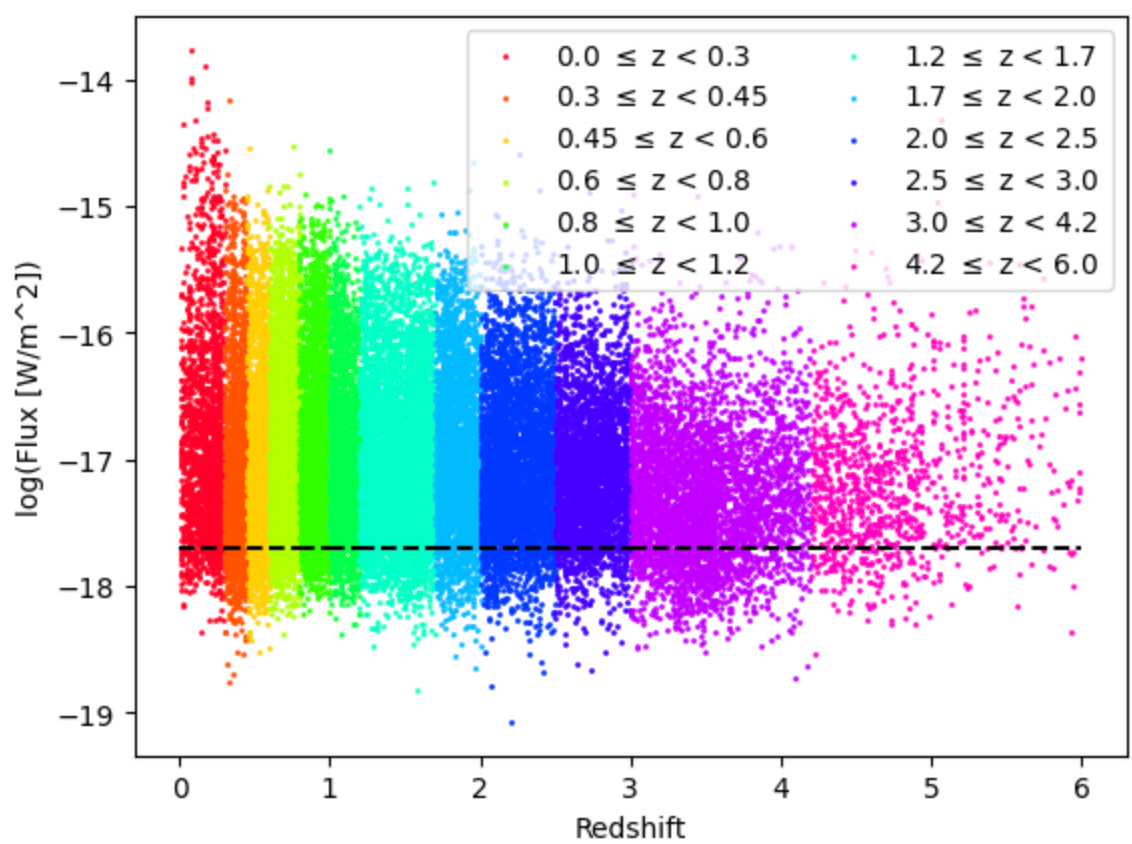

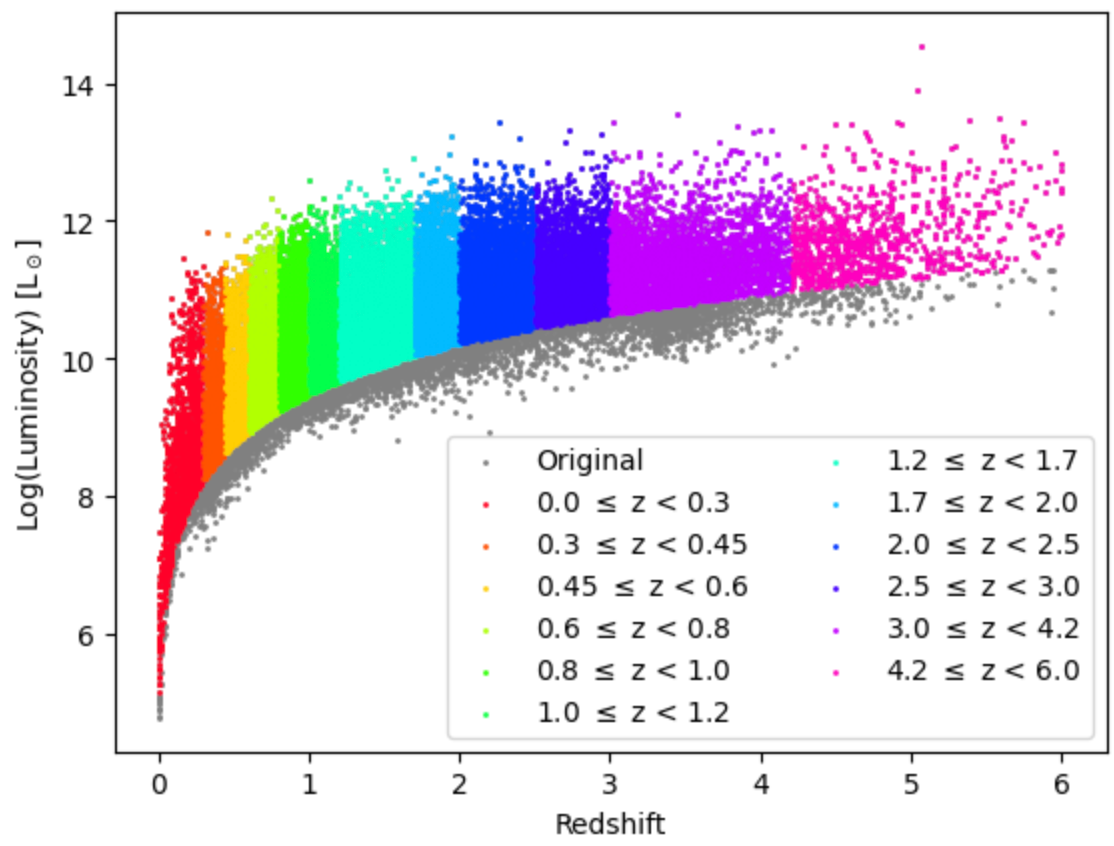

In [29]:
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
from IPython.display import Image, display

img1 = Image(filename='./plots/michael_show/Total Flux.png', width=640, height=480)
img2 = Image(filename='./plots/michael_show/Total Luminosity.png', width=640, height=480)
display(img1, img2)

### Stellar Luminosity

Flux limit = 2e-18

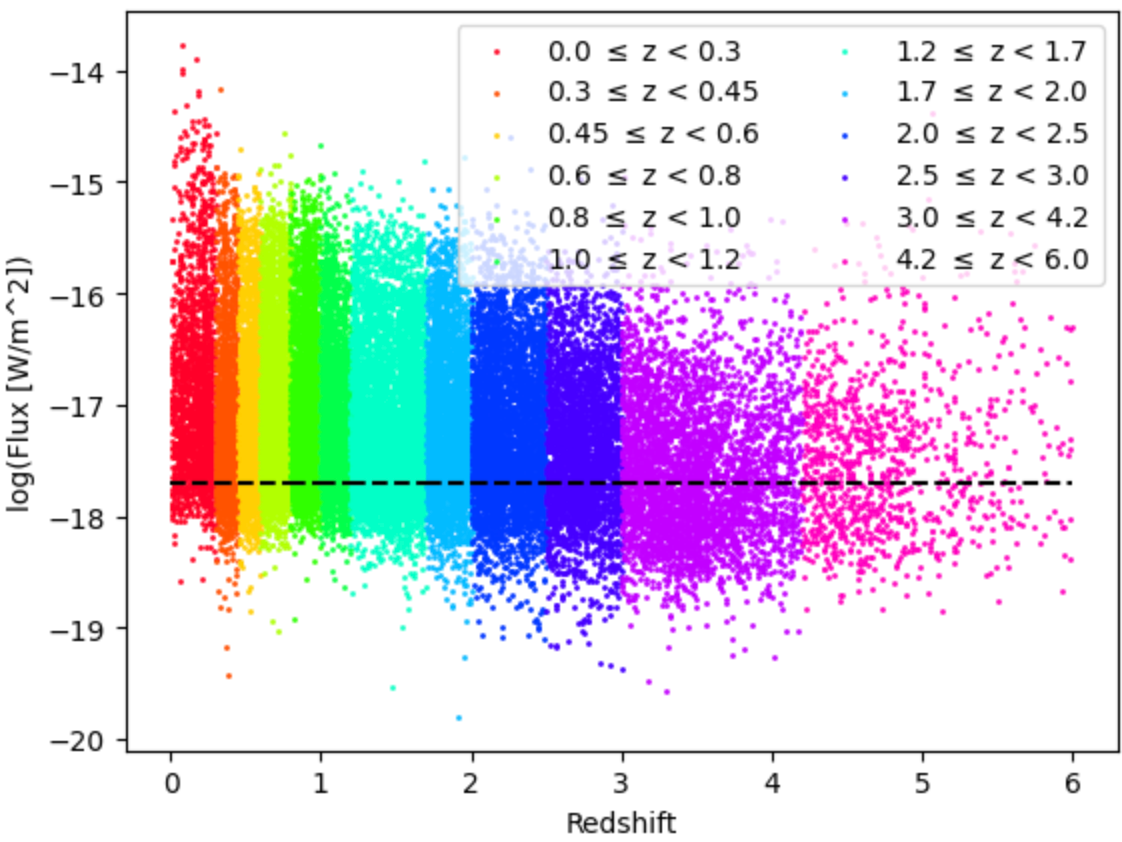

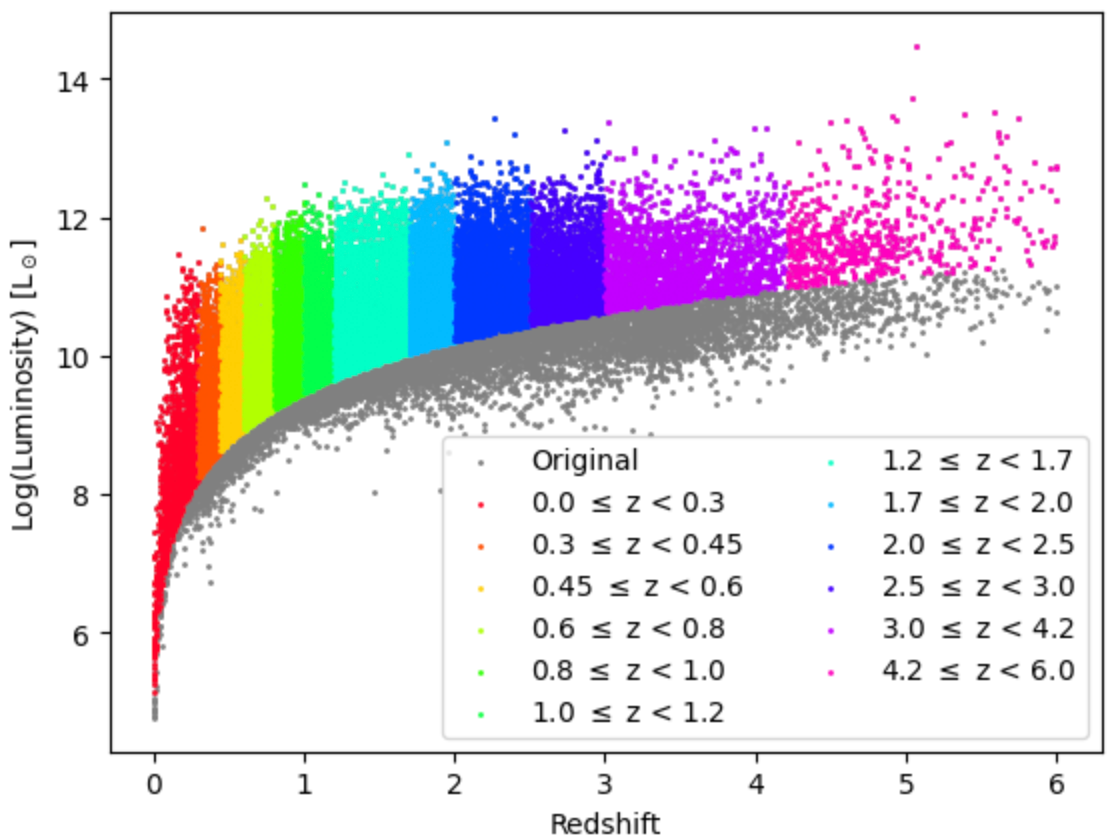

In [16]:
img1 = Image(filename='./plots/michael_show/Stellar Flux.png', width=640, height=480)
img2 = Image(filename='./plots/michael_show/Stellar Luminosity.png', width=640, height=480)
display(img1, img2)

### AGN Luminosity

Flux Limit = 2e-18

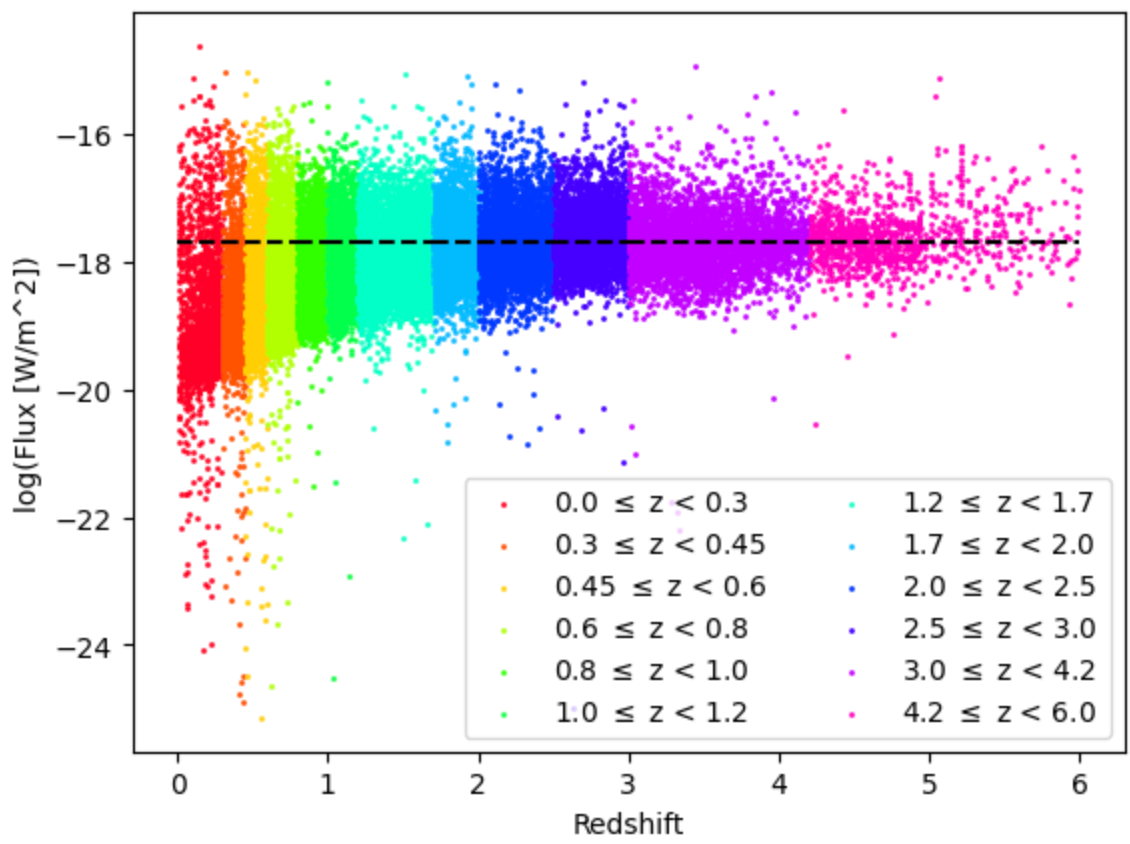

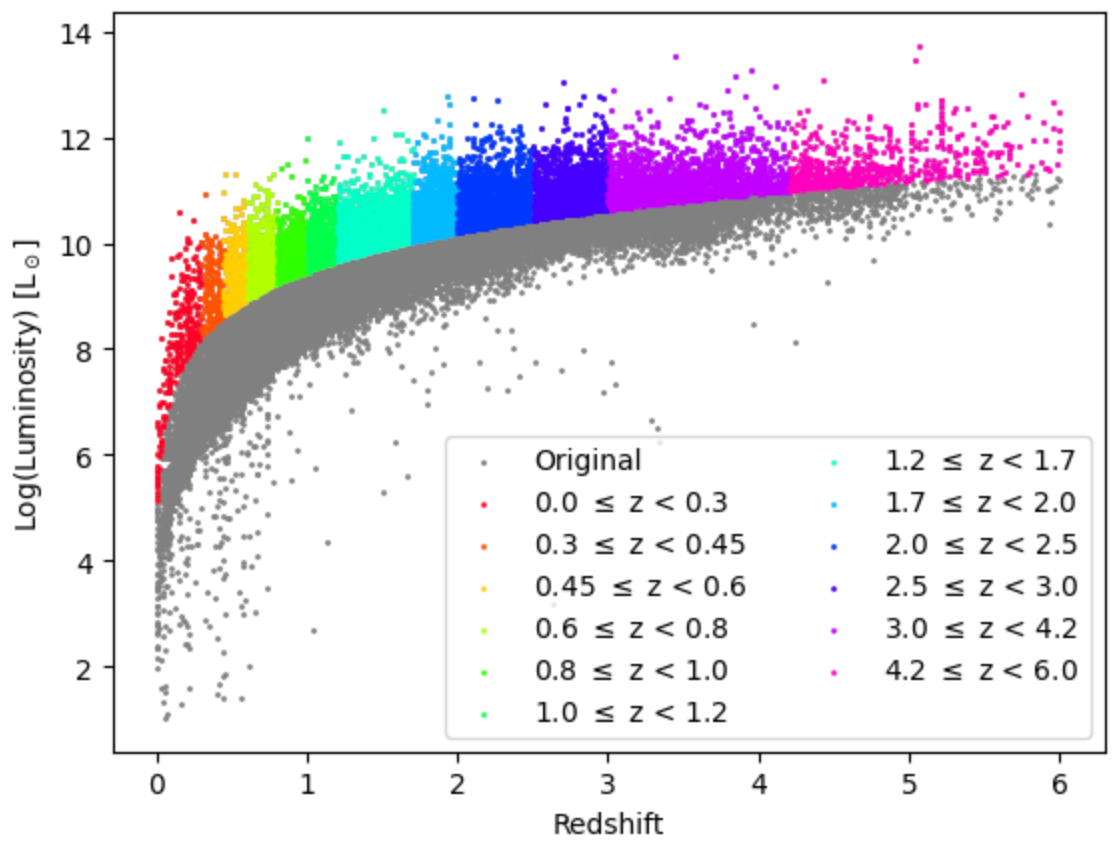

In [17]:
img1 = Image(filename='./plots/michael_show/AGN Flux-1.png', width=640, height=480)
img2 = Image(filename='./plots/michael_show/AGN Luminosity-1.png', width=640, height=480)
display(img1, img2)

### AGN Luminosity

Flux Limit = Varying

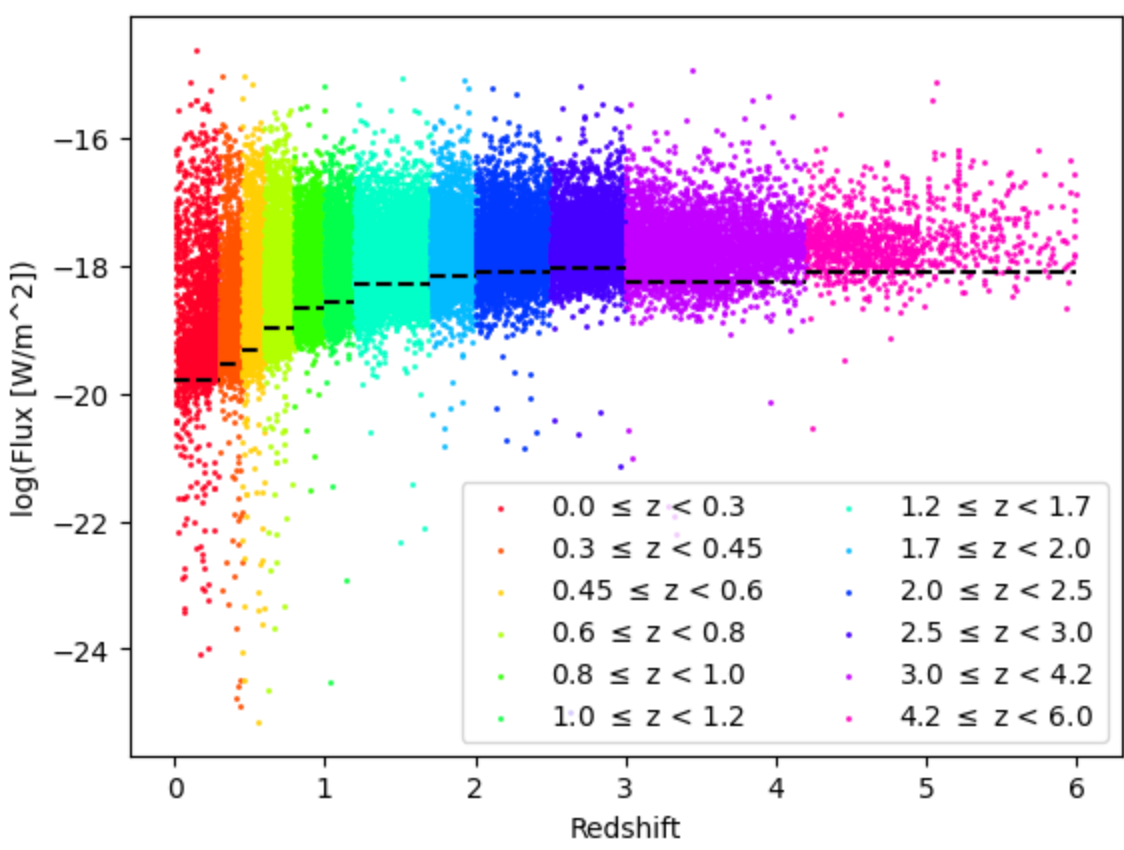

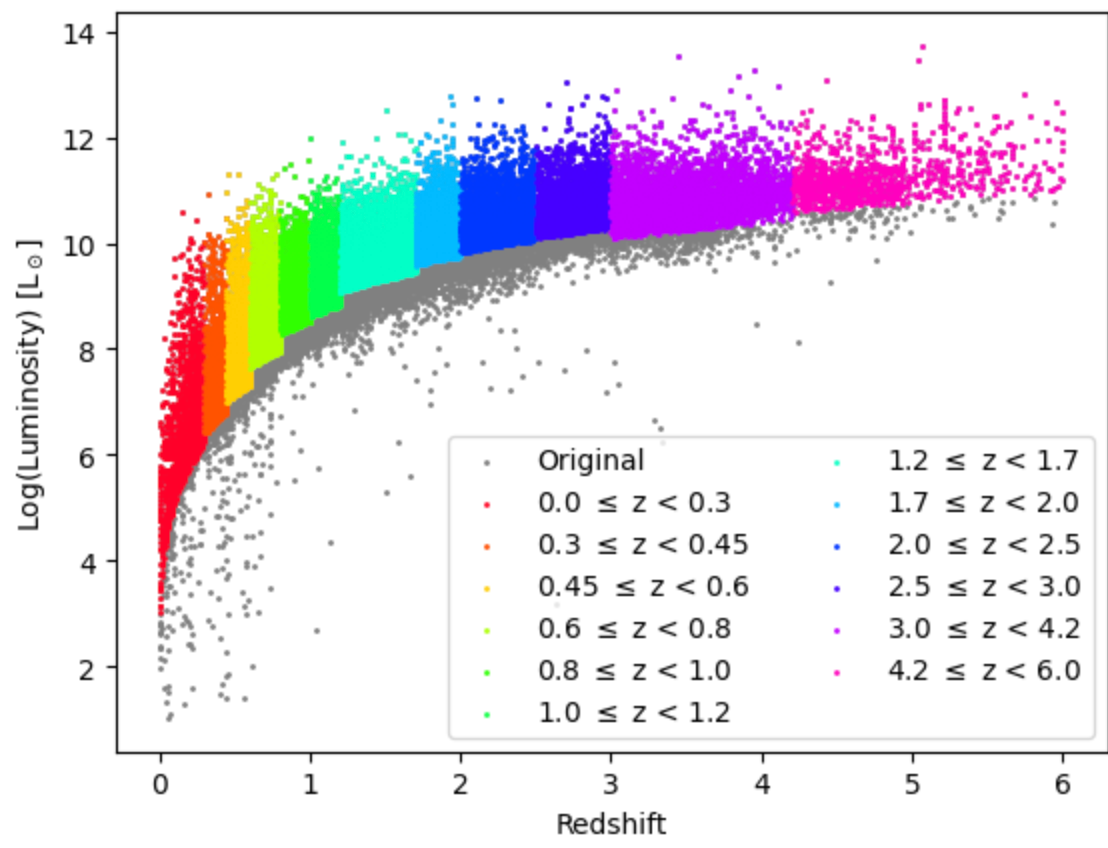

In [18]:
img1 = Image(filename='./plots/michael_show/AGN Flux-2.png', width=640, height=480)
img2 = Image(filename='./plots/michael_show/AGN Luminosity-2.png', width=640, height=480)
display(img1, img2)

### AGN Luminosity

Flux limit = 6e-19

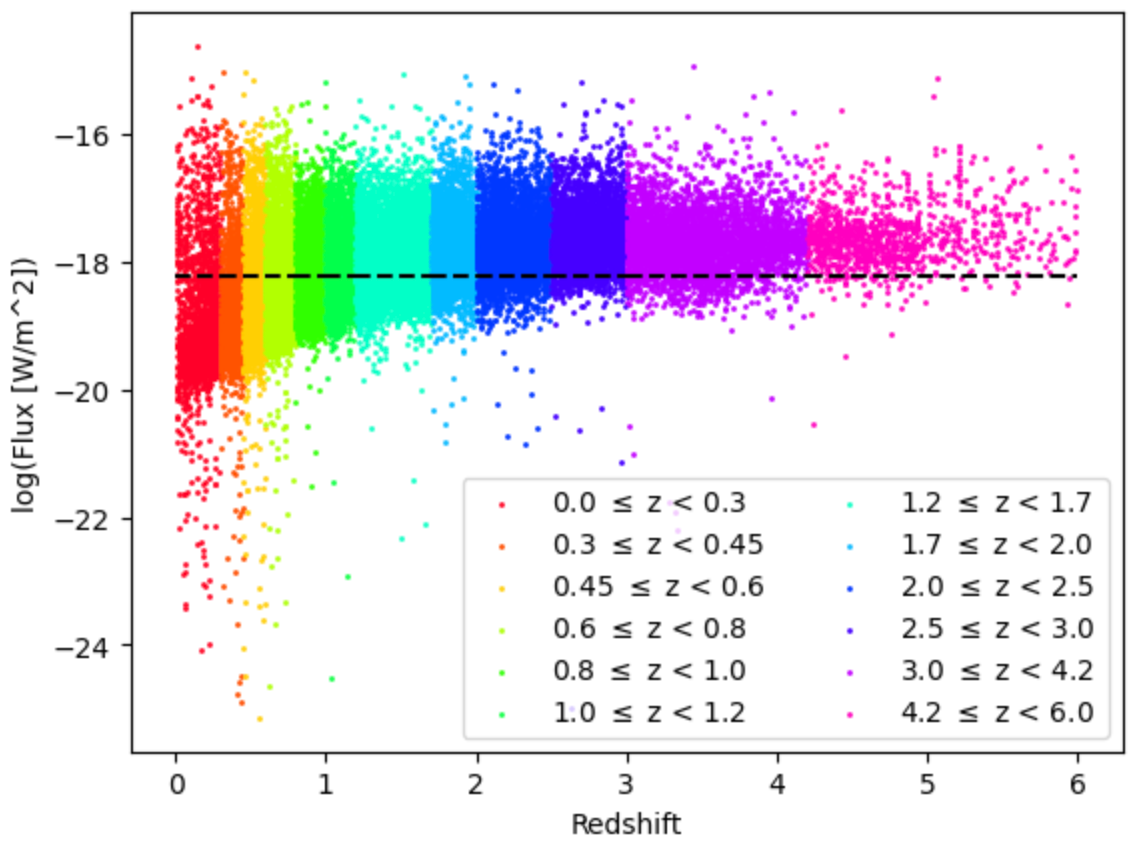

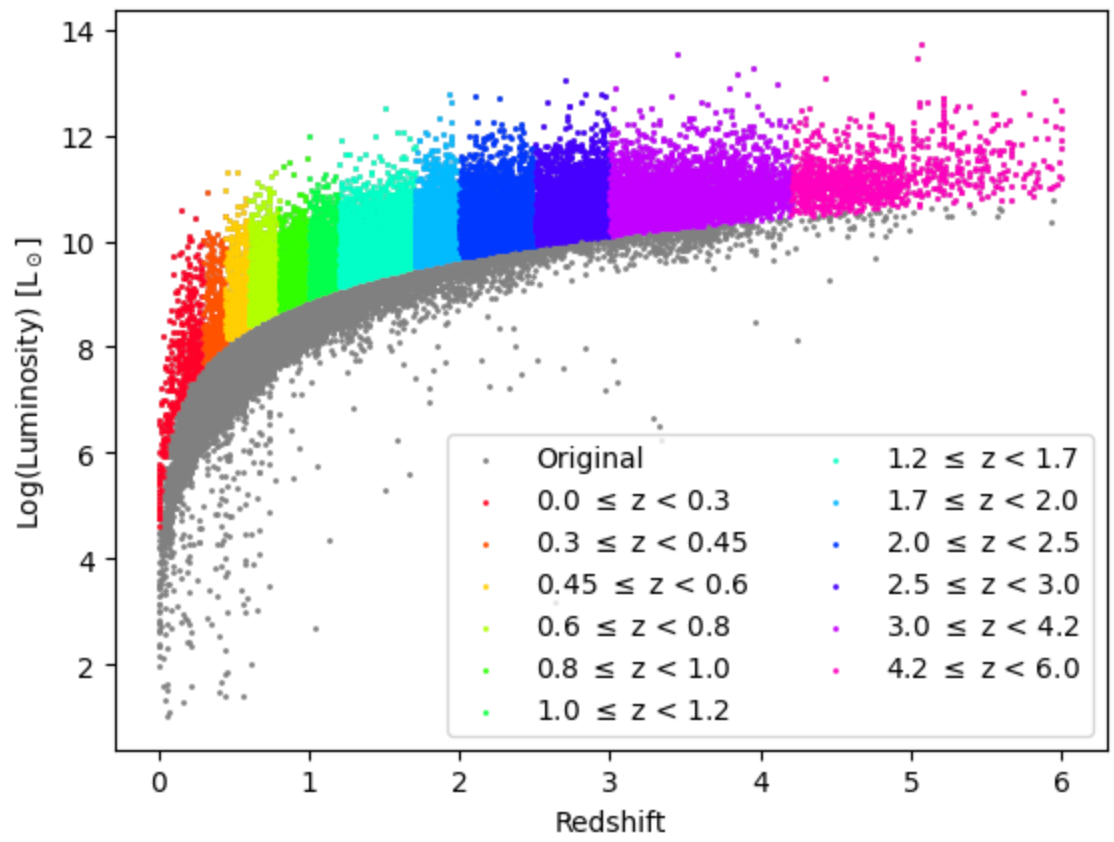

In [19]:
img1 = Image(filename='./plots/michael_show/AGN Flux-3.png', width=640, height=480)
img2 = Image(filename='./plots/michael_show/AGN Luminosity-3.png', width=640, height=480)
display(img1, img2)

### Bolometric Luminosity Functions

AGN Fractioned = varying flux limit

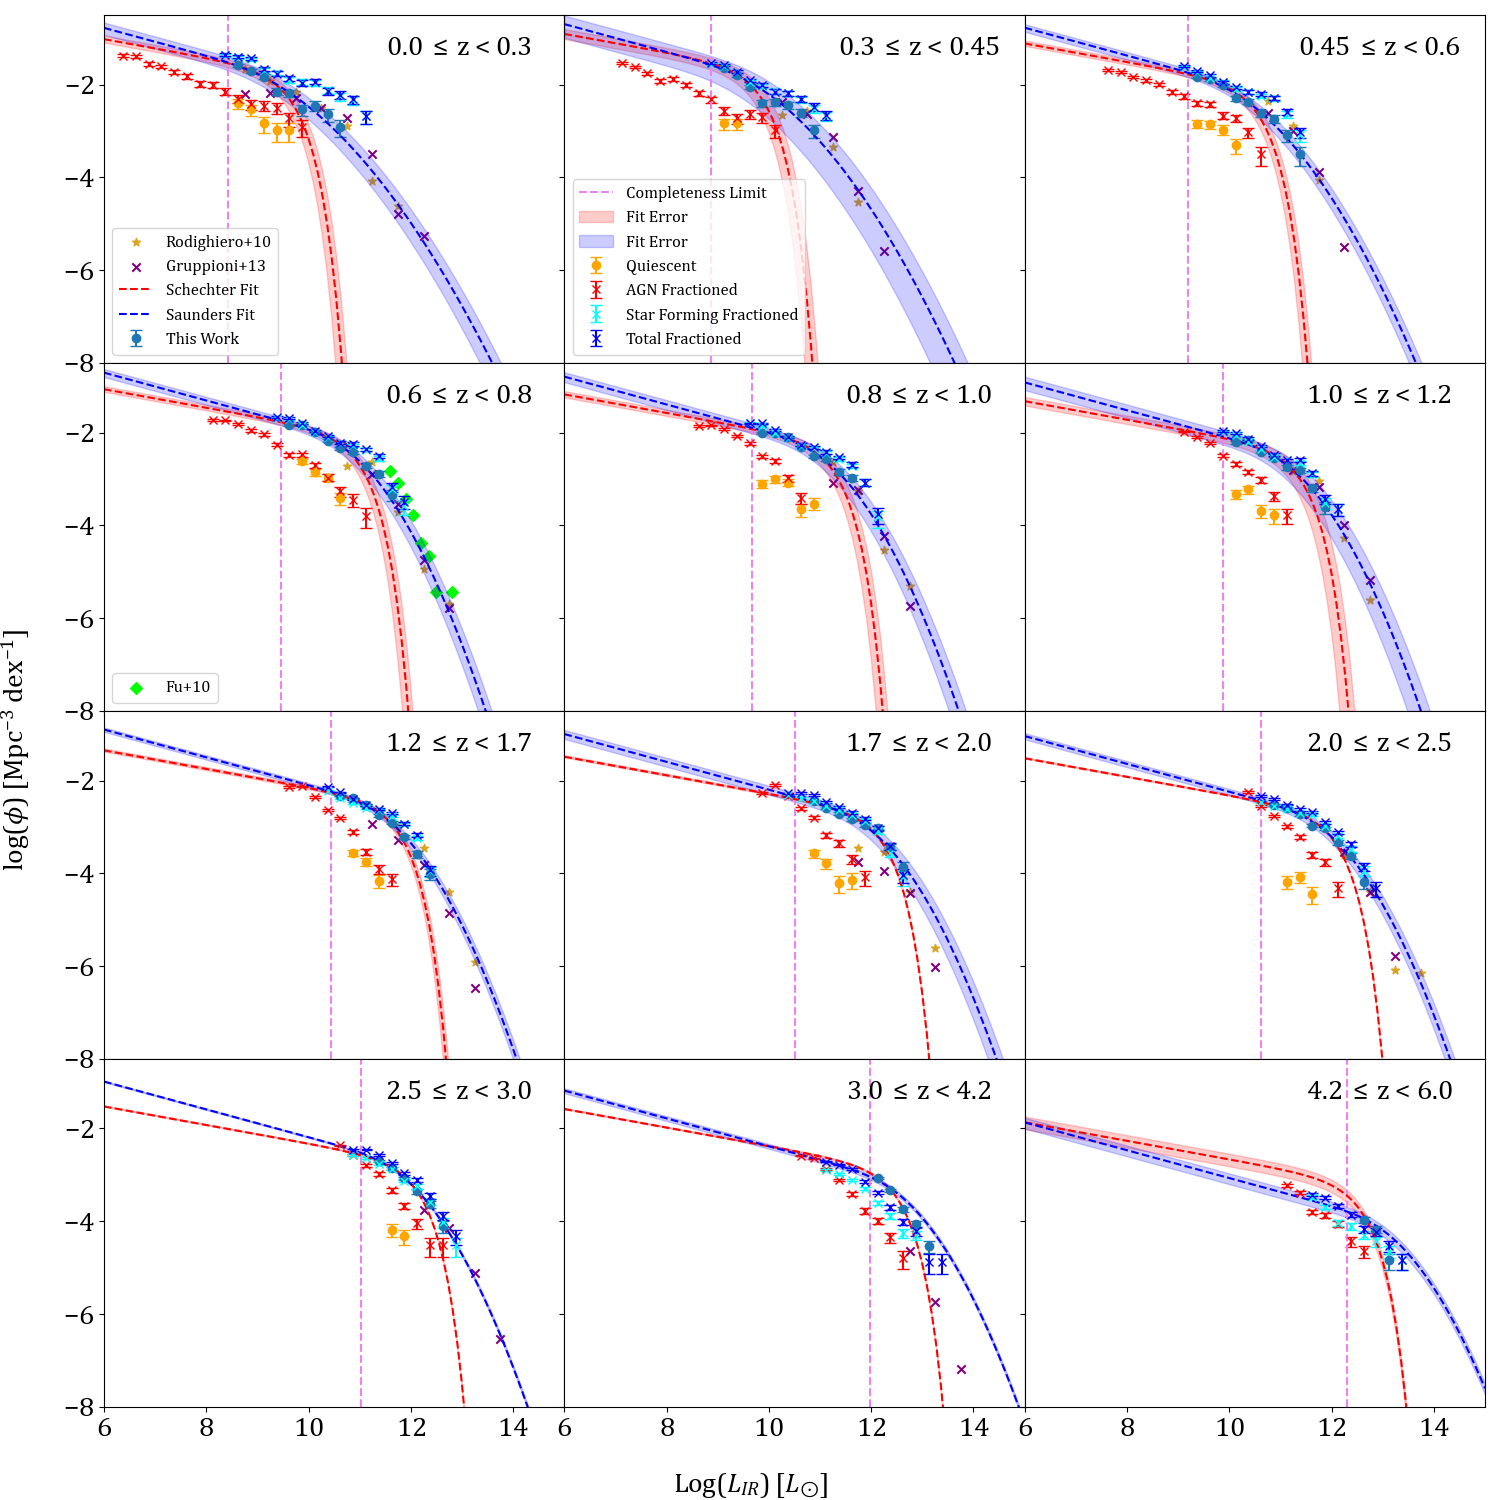

In [26]:
Image(filename='./LUMFUNCS/bolo_lf.png', width=1080, height=1920)

22997


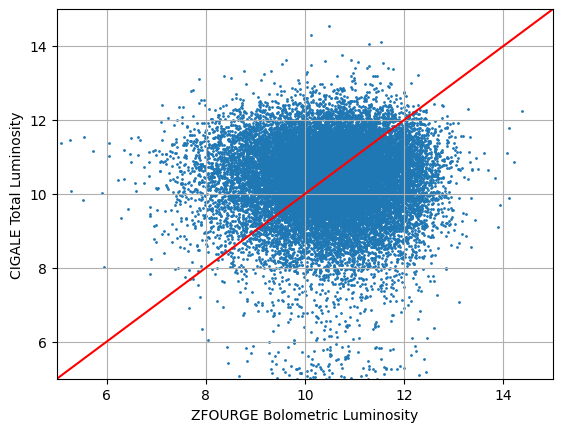

In [55]:
# Get the use=1 from the ZFOURGE data
data = pd.read_csv('./DATA/ZFOURGE/CDFS/CDFS_MAIN2.csv')
CDFS = pd.DataFrame(data)
CDFS['source'] = 'CDFS'

data = pd.read_csv('./DATA/ZFOURGE/COSMOS/COSMOS_MAIN2.csv')
COSMOS = pd.DataFrame(data)
COSMOS['source'] = 'COSMOS'

data = pd.read_csv('./DATA/ZFOURGE/UDS/UDS_MAIN2.csv')
UDS = pd.DataFrame(data)
UDS['source'] = 'UDS'

df = pd.concat([CDFS, COSMOS, UDS], ignore_index=True)
use_mask = df['Use'] == 1
LIR_mask = df['LIR'] > 5
df = df.loc[use_mask]
df = df.loc[LIR_mask]
print(len(df))

# Importing data
data = fits.getdata('./DATA/Ollie Data/CDFS/results.fits')
oCDFS = pd.DataFrame(np.array(data).byteswap().newbyteorder())
oCDFS['source'] = 'oCDFS'

data = fits.getdata('./DATA/Ollie Data/COSMOS/results.fits')
oCOSMOS = pd.DataFrame(np.array(data).byteswap().newbyteorder())
oCOSMOS['source'] = 'oCOSMOS'

data = fits.getdata('./DATA/Ollie Data/UDS/results.fits')
oUDS = pd.DataFrame(np.array(data).byteswap().newbyteorder())
oUDS['source'] = 'oUDS'

odf = pd.concat([oCDFS, oCOSMOS, oUDS], ignore_index=True)
odf = odf.loc[use_mask]
odf = odf.loc[LIR_mask]

common_values = df.index.intersection(odf.index)
df = df.loc[common_values]
odf = odf.loc[common_values]

agn_luminosity = odf['bayes.agn.luminosity']
stellar_luminosity = odf['bayes.stellar.lum']
total_luminosity = (agn_luminosity + stellar_luminosity) * 2.612*10**-27

zfourge_luminosity = df['LIR']

x = np.linspace(5, 15, 100)

plt.scatter(np.log10(zfourge_luminosity), np.log10(total_luminosity), label='Total Luminosity', s=1)
plt.plot(x, x, label='y=x', color='red')
plt.xlabel('ZFOURGE Bolometric Luminosity')
plt.ylabel('CIGALE Total Luminosity')
plt.grid()
plt.xlim(5, 15)
plt.ylim(5, 15)
plt.show()